In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

In [7]:
X_train = train_df.iloc[:, :-1]
y_train = pd.DataFrame(train_df.iloc[:, -1])
X_test = test_df.iloc[:, :-1]
y_test = pd.DataFrame(test_df.iloc[:, -1])

# XGBoost

In [14]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [15]:
# fit the model on the whole dataset
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[84029    11]
 [ 1607 10000]]
Accuracy Score is 0.9831
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     84040
           1       1.00      0.86      0.93     11607

    accuracy                           0.98     95647
   macro avg       0.99      0.93      0.96     95647
weighted avg       0.98      0.98      0.98     95647

AUC-ROC: 0.9307090875834542
LOGLOSS Value is 0.5843


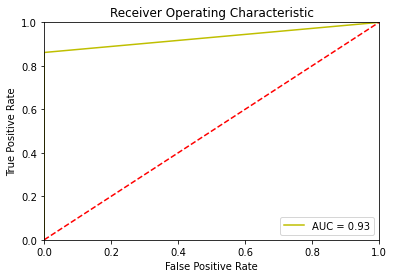

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()